C:\Users\glenn\AppData\Local\Temp\ipykernel_27464\2521439546.py:37: OptimizeWarning: Covariance of the parameters could not be estimated
  parametersX, covarianceX = curve_fit(linearFunc, np.arange(15,maxImages,5), front_array_absolute[:,0])


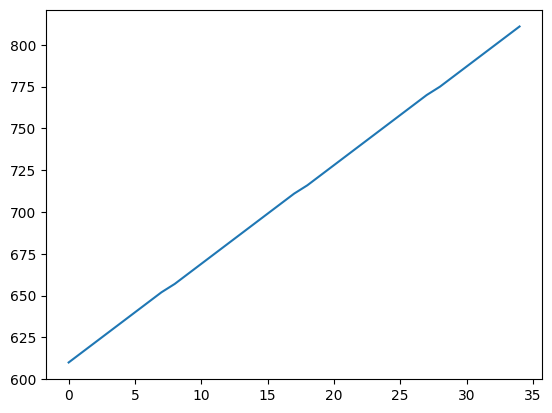

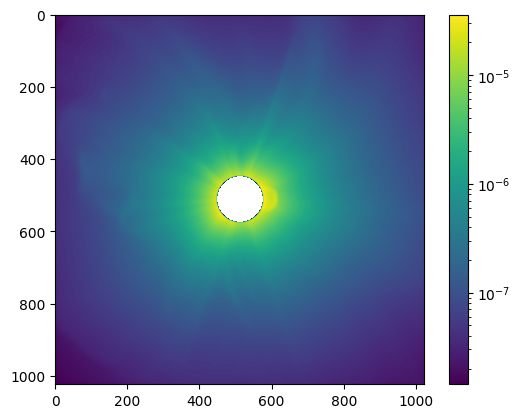

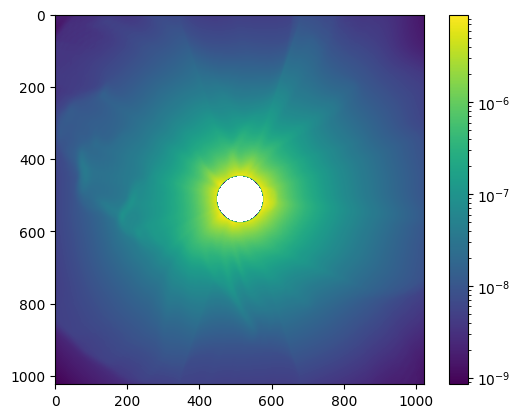

Processing subtraction for image  0
Processing subtraction for image  1
Processing subtraction for image  2
Processing subtraction for image  3
Processing subtraction for image  4
Processing subtraction for image  5
Processing subtraction for image  6
Processing subtraction for image  7
Processing subtraction for image  8
Processing subtraction for image  9
Processing subtraction for image  10
Processing subtraction for image  11
Processing subtraction for image  12
Processing subtraction for image  13
Processing subtraction for image  14
Processing subtraction for image  15
Processing subtraction for image  16
Processing subtraction for image  17
Processing subtraction for image  18
Processing subtraction for image  19
Processing subtraction for image  20
Processing subtraction for image  21
Processing subtraction for image  22
Processing subtraction for image  23
Processing subtraction for image  24
Processing subtraction for image  25
Processing subtraction for image  26
Processing 

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit


# Array of the front of the CME through human analysis
# A linear fit is applied to the data to interpolate the front at each time step
maxImages = 50

#CME_1
# front_array_absolute = [[550,591],[555,617],[567,640],[587,656],[590,684],[610,701],[615,729],[627,753],[638,769],[646,797],[643,822]]



#original
front_array_absolute = [[512,608],[512,640],[512,671],[512,702],[512,730],[512,761],[512,783]]

# +50
# front_array_absolute = [[512,428],[512,397],[512,365],[512,335],[512,300],[512,265],[512,230]]

# -10
# front_array_absolute = [[512,413],[512,392],[512,356],[512,330],[512,304],[512,275],[512,252]]

#                                                           
front_array_absolute = np.array(front_array_absolute)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,maxImages,5), front_array_absolute[:,1])
parametersX, covarianceX = curve_fit(linearFunc, np.arange(15,maxImages,5), front_array_absolute[:,0])
front_array_absolute = np.zeros((maxImages-15,2), dtype=int)
front_array_absolute[:,0] = np.floor((linearFunc(np.arange(15,maxImages), *parametersX)))
front_array_absolute[:,1] = np.floor((linearFunc(np.arange(15,maxImages), *parameters)))


# Plot the front of the CME as a function of timestep
plt.figure()
plt.plot(front_array_absolute[:,1])
plt.show()


# Define the region of interest depending on where the CME is located

# xMin = 0
# xMax = 500
xMin = 512
xMax = 1000

# yMin = 512
# yMax = 1000

yMin = 250
yMax = 750

pBdata = []
tBdata =[]

for i in range(15,maxImages,1):
    if i < 10:
        st = '0' + str(i)
    else:
        st = str(i)
    fits_file_pB = fits.open(f'CME_0_pB\stepnum_0{st}.fits')
    fits_file_tB = fits.open(f'CME_0_tB\stepnum_0{st}.fits')
    pBdata.append(fits_file_pB[0].data)
    tBdata.append(fits_file_tB[0].data)

BRdata = []
BTdata = []
for i in range(len(pBdata)):
    BRdata.append(0.5*( tBdata[i] -pBdata[i] ))
    BTdata.append(0.5*( tBdata[i] + pBdata[i] ))


plt.figure()
plt.imshow(BTdata[0], norm=LogNorm())
plt.colorbar()
plt.figure()
plt.imshow(BRdata[0], norm=LogNorm())
plt.colorbar()
plt.show()

posMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))
negMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))

# kernel_size = 5
# kernel = np.full((kernel_size, kernel_size), 1/(kernel_size*kernel_size))


# print(allIndices)

# for i in range(len(pBdata)):
#     pBdata[i] = signal.convolve2d(pBdata[i], kernel, mode='same', boundary='fill')
#     tBdata[i] = signal.convolve2d(tBdata[i], kernel, mode='same', boundary='fill')
# pBdataSubtract = medianOverTime(pBdata)
# tBdataSubtract = medianOverTime(tBdata)

# plt.figure()
# plt.imshow(pBdataSubtract, norm=LogNorm())
# plt.figure()
# plt.imshow(tBdataSubtract, norm=LogNorm())
# plt.show()
# print(np.array(pBdata).shape)
# print(pBdataSubtract.shape)

# allIndices = calculateRadialBands(BRdata[0],direction='right')

epsilonArray = np.zeros(len(pBdata))

# testSub = np.zeros((1024,1024))

# median_values_BR, r_values = calculateMedianPixelValuesOverTime(BRdata,allIndices)
# median_values_BT, r_values = calculateMedianPixelValuesOverTime(BTdata,allIndices)

# testSubBR = subtractRadialMedian(testSub, median_values_BR)   
# testSubBT = subtractRadialMedian(testSub,median_values_BT)  
# plt.figure()
# plt.imshow(-testSubBR, norm=LogNorm())
# plt.colorbar()
# plt.figure()
# plt.imshow(-testSubBT, norm=LogNorm())
# plt.colorbar()
# plt.show()


for i in range(len(pBdata)):
    print("Processing subtraction for image ", i)

    #choose subtraction method 

    #Radial median subtraction:

    # median_values_BR, r_values = calculateMedianPixelValues(BRdata[i],allIndices)
    # median_values_BT, r_values = calculateMedianPixelValues(BTdata[i],allIndices)
    # plt.figure()
    # plt.imshow(BRdata[i], norm=LogNorm())
    # plt.colorbar()
    
    # BRdata[i] = subtractRadialMedian(BRdata[i], median_values_BR)  
    # BTdata[i] = subtractRadialMedian(BTdata[i], median_values_BT)
    # plt.figure()
    # plt.imshow(BRdata[i], norm=LogNorm())
    # plt.show()
    
  
    # Function fit subtraction:
    # if(i == 3):
    #     BRdata[i] = functionFitSubtract(BRdata[i], front_array_absolute[i,:], 'right', save=True)
    #     BTdata[i] = functionFitSubtract(BTdata[i], front_array_absolute[i,:], 'right',save=True)

    # else:
    #     BRdata[i] = functionFitSubtract(BRdata[i], front_array_absolute[i,:], 'right')
    #     BTdata[i] = functionFitSubtract(BTdata[i], front_array_absolute[i,:], 'right')

    # BRdata[i] = BRdata[i] + testSubBR
    # BTdata[i] = BTdata[i] + testSubBT

for i in range(len(pBdata)):
    tBdata[i] =  BTdata[i] + BRdata[i]
    pBdata[i] = BTdata[i] - BRdata[i]
    

# Calculate the exit angles for each pixel in the region of interest


In [2]:

for i in range(len(pBdata)):
    print("Processing calculations for image ", i)
    posMat, negMat, epsilonArray[i]= calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax), front_array_absolute[i,:], type = 'Xi')
    posMats[i] = posMat
    negMats[i] = negMat

Processing calculations for image  0


c:\Users\glenn\Documents\CME-polarization\Scripts_CME_0_no_sub\helper_funcs.py:18: RuntimeWarning: invalid value encountered in divide
  pBratioFull = image_data_pB/image_data_tB


Processing calculations for image  1
Processing calculations for image  2
Processing calculations for image  3
Processing calculations for image  4
Processing calculations for image  5
Processing calculations for image  6
Processing calculations for image  7
Processing calculations for image  8
Processing calculations for image  9
Processing calculations for image  10
Processing calculations for image  11
Processing calculations for image  12
Processing calculations for image  13
Processing calculations for image  14
Processing calculations for image  15
Processing calculations for image  16
Processing calculations for image  17
Processing calculations for image  18
Processing calculations for image  19
Processing calculations for image  20
Processing calculations for image  21
Processing calculations for image  22
Processing calculations for image  23
Processing calculations for image  24
Processing calculations for image  25
Processing calculations for image  26
Processing calculatio

[30.60870666 31.31257851 31.97924734 32.61676077 33.26569146 33.87375074
 34.51065848 35.13131887 35.86712672 36.44126985 37.0263636  37.61825987
 38.15980089 38.70265946 39.22516395 39.75586693 40.26686415 40.87779877
 41.43847371 41.9312559  42.44399566 42.96839078 43.48911166 44.0382597
 44.58127092 45.12515163 45.65127117 46.17940745 46.67044877 47.12841058
 47.55561971 47.97624106 48.44842251 48.97313325 49.53393612]
[-13.38214416 -13.03132851 -12.64330984 -12.22613577 -11.82037896
 -11.37375074 -10.95597098 -10.52194387 -10.37884547  -9.8983011
  -9.42870735  -8.96591612  -8.45276964  -7.94094071  -7.4087577
  -6.88477318  -6.34062751  -5.89688837  -5.57866787  -5.01677487
  -4.47483876  -3.94455738  -3.41060118  -2.9050716   -2.39340471
  -1.88260686  -1.35404739  -0.82750429  -0.43964583   0.1570724
   0.78454365   1.41860296   2.00110248   2.53107297   3.02495158]
pos m:  0.5499307447505138
pos b:  31.261825555511788
pos mean:  40.61064821627053
pos sigma: 5.560727994633148
ne

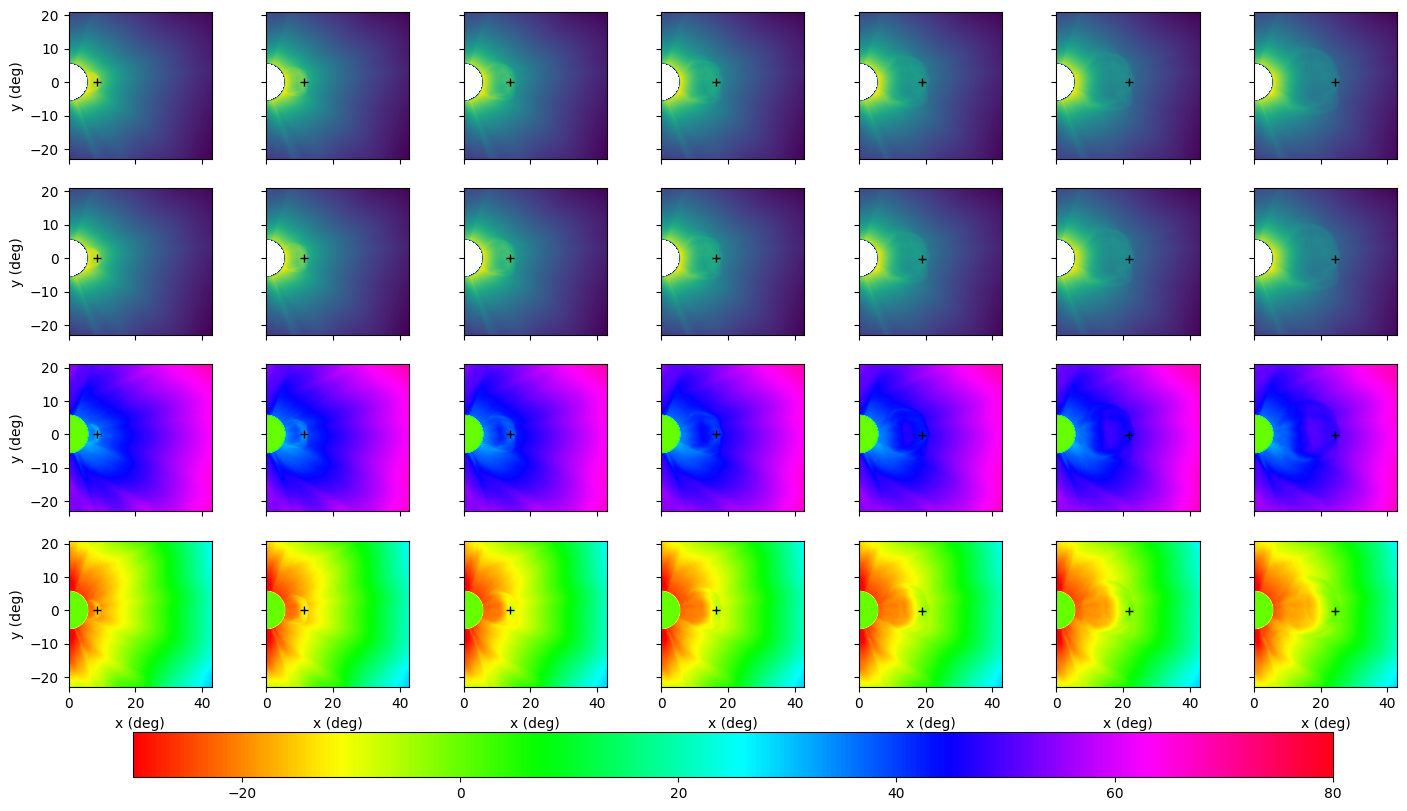

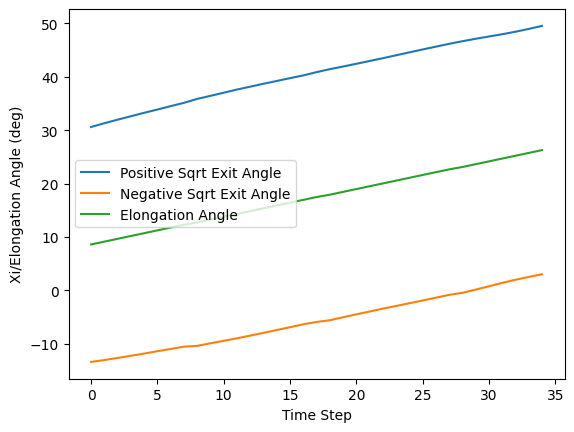

In [3]:
# xMin = 0
# xMax = 500
xMin = 512
xMax = 1000

yMin = 250
yMax = 750

# yMin = 512
# yMax = 1000


# vmin = 60
# vmax = 150
vmin = -30
vmax = 80

front_array_adj = front_array_absolute - np.array([512,512])
#plot the images with the front of the CME marked

fig, axs = plt.subplots(4,7,figsize=(15, 9), sharex=True, sharey=True)



for i in range(7): 
    
    axs[0,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm(), extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0],)
    axs[1,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm(), extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0])
    axs[2,i].imshow(posMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmin = vmin, vmax=vmax, cmap='hsv', extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0])
    im = axs[3,i].imshow(negMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv', extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0])
    
for i in range(4):
    axs[i,0].set_ylabel('y (deg)')
        

for i in range(7):
    axs[3,i].set_xlabel('x (deg)')



for i in range(7):
    axs[0,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')
    axs[1,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')
    axs[2,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')
    axs[3,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')

fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)

cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')


xMin = 0
xMax = 1023

yMin = 0
yMax = 1023

posMatsData = posMats[:,yMin:yMax,xMin:xMax]
negMatsData = negMats[:,yMin:yMax,xMin:xMax]
posMatsGraph = np.zeros(len(posMatsData))
negMatsGraph = np.zeros(len(negMatsData))

for i in range(len(posMatsData)):
    posMatsGraph[i] = posMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
    negMatsGraph[i] = negMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
print(posMatsGraph)
print(negMatsGraph)

posCoef = np.polyfit(np.arange(0,maxImages-15),posMatsGraph,1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])
print("pos mean: ", np.mean(posMatsGraph))
print("pos sigma:", np.std(posMatsGraph))



negCoef = np.polyfit(np.arange(0,maxImages-15),negMatsGraph,1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])
print("neg mean: ", np.mean(negMatsGraph))
print("neg sigma:", np.std(negMatsGraph))
# poly1d_fn = np.poly1d(posCoef) 


fig, axs = plt.subplots()  
axs.plot(posMatsGraph, label='Positive Sqrt Exit Angle')
axs.plot(negMatsGraph, label='Negative Sqrt Exit Angle') 
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='center left') 
plt.show()



[[1.03738319 0.15713543]
 [1.03868012 0.16712505]
 [1.0397331  0.17712664]
 [1.04054972 0.18713656]
 [1.04126533 0.1971756 ]
 [1.04168071 0.20720318]
 [1.04205929 0.21726752]
 [1.04222333 0.22733076]
 [1.0432136  0.23594299]
 [1.04292442 0.24598889]
 [1.04251976 0.2560448 ]
 [1.04198472 0.26610552]
 [1.04102964 0.27609238]
 [1.03990292 0.28606327]
 [1.03848731 0.29598164]
 [1.03693372 0.30588537]
 [1.03508335 0.31572831]
 [1.03364167 0.32571666]
 [1.0326359  0.33412757]
 [1.03018354 0.34383991]
 [1.0276684  0.35354524]
 [1.02504619 0.36322784]
 [1.02222068 0.37285123]
 [1.0194102  0.38249292]
 [1.01638729 0.39206757]
 [1.01320005 0.40158949]
 [1.00971482 0.41100095]
 [1.00607144 0.42035272]
 [1.00328619 0.42825662]
 [0.9988013  0.43725315]
 [0.99389193 0.44604908]
 [0.98873927 0.45471535]
 [0.98380656 0.46346367]
 [0.97912157 0.47231649]
 [0.97456979 0.48122741]]


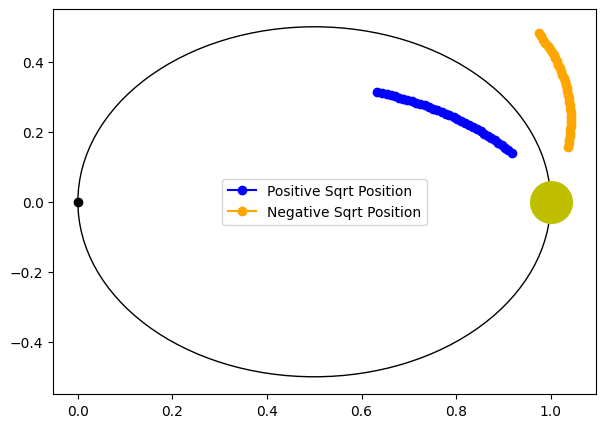

In [4]:
plt.figure(figsize=(7,5))
plt.plot(0,0, 'ko')
plt.plot(1,0, 'yo', markersize=30)

posPositionArray = np.zeros((len(posMatsGraph),2))
for i in range(len(posMatsGraph)):
    xi = posMatsGraph[i]
    epsilon = epsilonArray[i]
    cotXi = 1/np.tan(np.radians(xi))
    # print("cotXi = ", cotXi)
    tanE = np.tan(np.radians(epsilon))
    # print("tanE = ", tanE)
    x = cotXi/(tanE + cotXi)
    y = tanE*x
    posPositionArray[i] = np.array([x,y])

plt.plot(posPositionArray[:,0],posPositionArray[:,1],color='blue', marker="o", label='Positive Sqrt Position')

negPositionArray = np.zeros((len(negMatsGraph),2))
for i in range(len(posMatsGraph)):
    xi = negMatsGraph[i]
    epsilon = epsilonArray[i]
    cotXi = 1/np.tan(np.radians(xi))
    # print("cotXi = ", cotXi)
    tanE = np.tan(np.radians(epsilon))
    # print("tanE = ", tanE)
    x = cotXi/(tanE + cotXi)
    y = tanE*x
    negPositionArray[i] = np.array([x,y])
print(negPositionArray)
plt.plot(negPositionArray[:,0],negPositionArray[:,1],color='orange', marker="o", label='Negative Sqrt Position')
thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
plt.gca().add_patch(thomson)
# plt.xlim(-0.05,1.05)
# plt.ylim(-0.05,0.5)
plt.legend()
plt.show()

np.save('output/outputXiPos.npy', posMatsGraph)
np.save('output/outputXiNeg.npy', negMatsGraph)
np.save('output/outputEpsilon.npy', epsilonArray)